# Começando a aprender ciência de dados

Neste minicurso iremos entender como a ciência de dados funciona passo a passo para resolver um problema real. 

Veremos onde podemos obter dados, como explorar e preparar esses dados para um modelo, fazer previsões futuras, como criar e executar esse modelo e como saber se ele está indo bem, interpretando suas métricas. 

E também como otimizar o resultado e salvar o modelo. Faremos esse passo a passo levando em consideração as melhores práticas de aprendizagem de máquina.

## Iremos usar dados de imunoterapia do [repositório da UCI](https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset#) e do artigo abaixo:

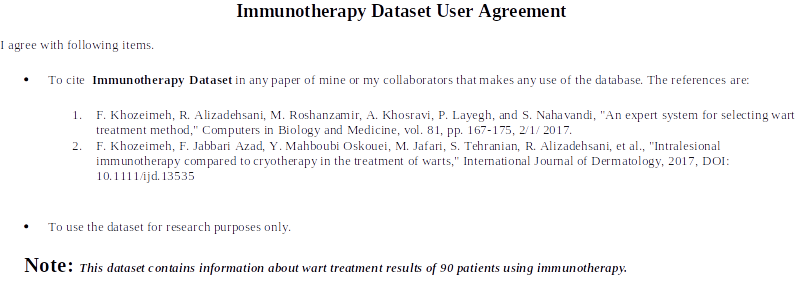

## 1.Importando e lendo os dados

In [115]:
import pandas as pd

In [116]:
df = pd.read_excel('/content/Immunotherapy.xlsx')

In [117]:
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


### 1.a) Renomeando colunas

In [118]:
novas_colunas = {'sex': 'sexo', 'age':'idade', 'Time': 'meses_pre_tratamento',
                 'Number_of_Warts': 'qtd_verrugas', 'Type':'tipo', 'Area':'area',
                 'induration_diameter': 'diametro', 'Result_of_Treatment':'resultado'}

In [119]:
df = df.rename(columns=novas_colunas)

Tipos de verrugas (contagem) 
* 1– Comum (47),
* 2– Plantar (22),
* 3– Ambas (21)

In [120]:
df.head()

,sexo,idade,meses_pre_tratamento,qtd_verrugas,tipo,area,diametro,resultado
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


### 1.b) Entendendo medidas descritivas dos dados e ententendo tipos de colunas

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sexo,90.0,1.544444,0.500811,1.0,1.00,2.00,2.0000,2.0
idade,90.0,31.044444,12.235435,15.0,20.25,28.50,41.7500,56.0
meses_pre_tratamento,90.0,7.230556,3.098166,1.0,5.00,7.75,9.9375,12.0
qtd_verrugas,90.0,6.144444,4.212238,1.0,2.00,6.00,8.7500,19.0
tipo,90.0,1.711111,0.824409,1.0,1.00,1.00,2.0000,3.0
area,90.0,95.700000,136.614643,6.0,35.50,53.00,80.7500,900.0
diametro,90.0,14.333333,17.217707,2.0,5.00,7.00,9.0000,70.0
resultado,90.0,0.788889,0.410383,0.0,1.00,1.00,1.0000,1.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sexo                  90 non-null     int64  
 1   idade                 90 non-null     int64  
 2   meses_pre_tratamento  90 non-null     float64
 3   qtd_verrugas          90 non-null     int64  
 4   tipo                  90 non-null     int64  
 5   area                  90 non-null     int64  
 6   diametro              90 non-null     int64  
 7   resultado             90 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.8 KB


## 2.Explorando e visualizando os dados

In [123]:
import seaborn as sns

In [124]:
for coluna in df.columns:
  print(coluna)

sexo
idade
meses_pre_tratamento
qtd_verrugas
tipo
area
diametro
resultado


In [125]:
import matplotlib.pyplot as plt

### 2.a) Histrogramas das colunas

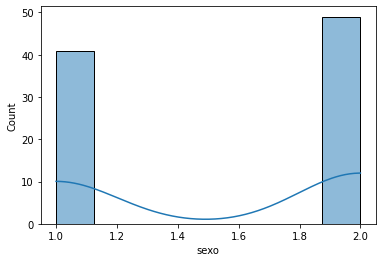

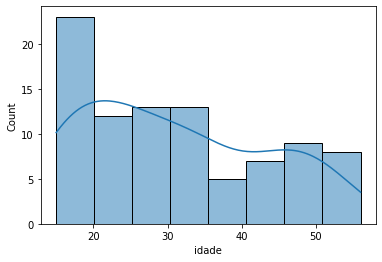

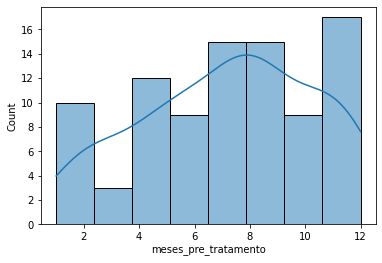

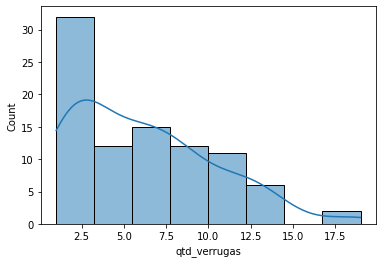

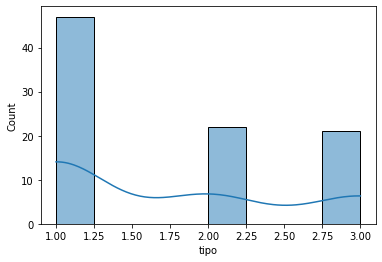

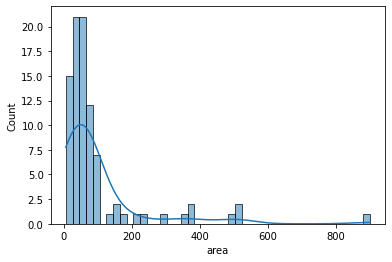

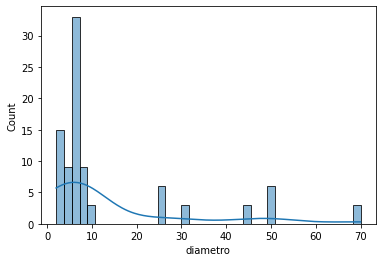

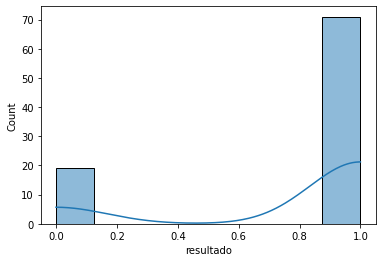

In [180]:
for coluna in df.columns:
  sns.histplot(data=df, x=coluna, kde=True) # kde plota a curva da distrubuição
  plt.show()

### 2.b)Boxplots (diagramas de caixa) das colunas

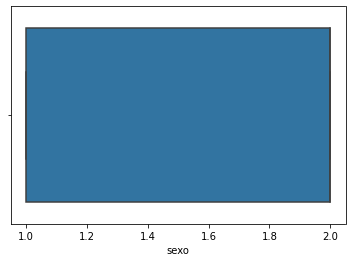

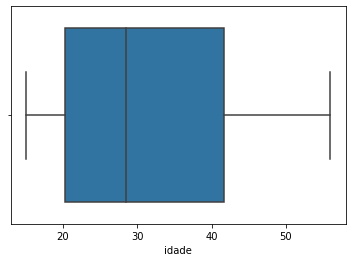

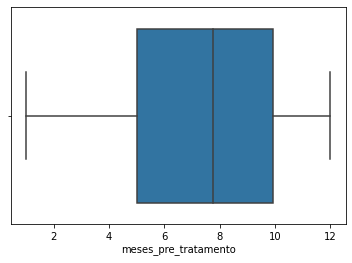

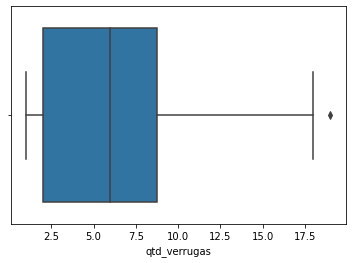

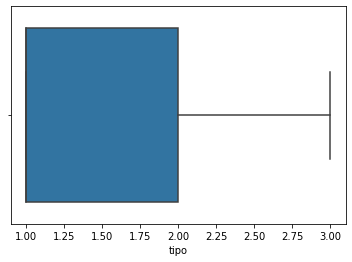

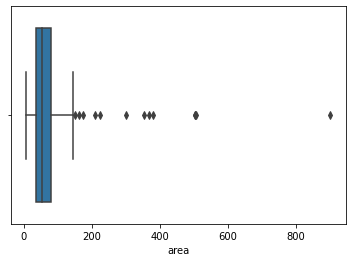

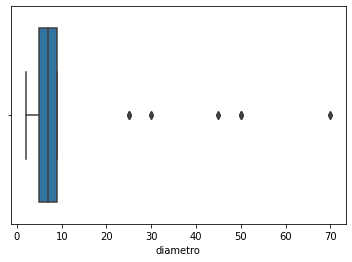

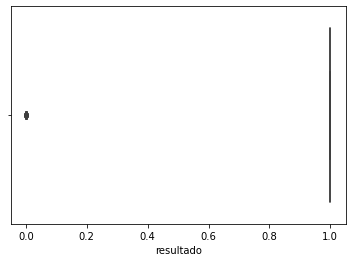

In [13]:
for coluna in df.columns:
  sns.boxplot(data=df, x=coluna)
  plt.show()

### 2.c) Distribuições das combinacoes de colunas de acordo com o resultado (pairplot)

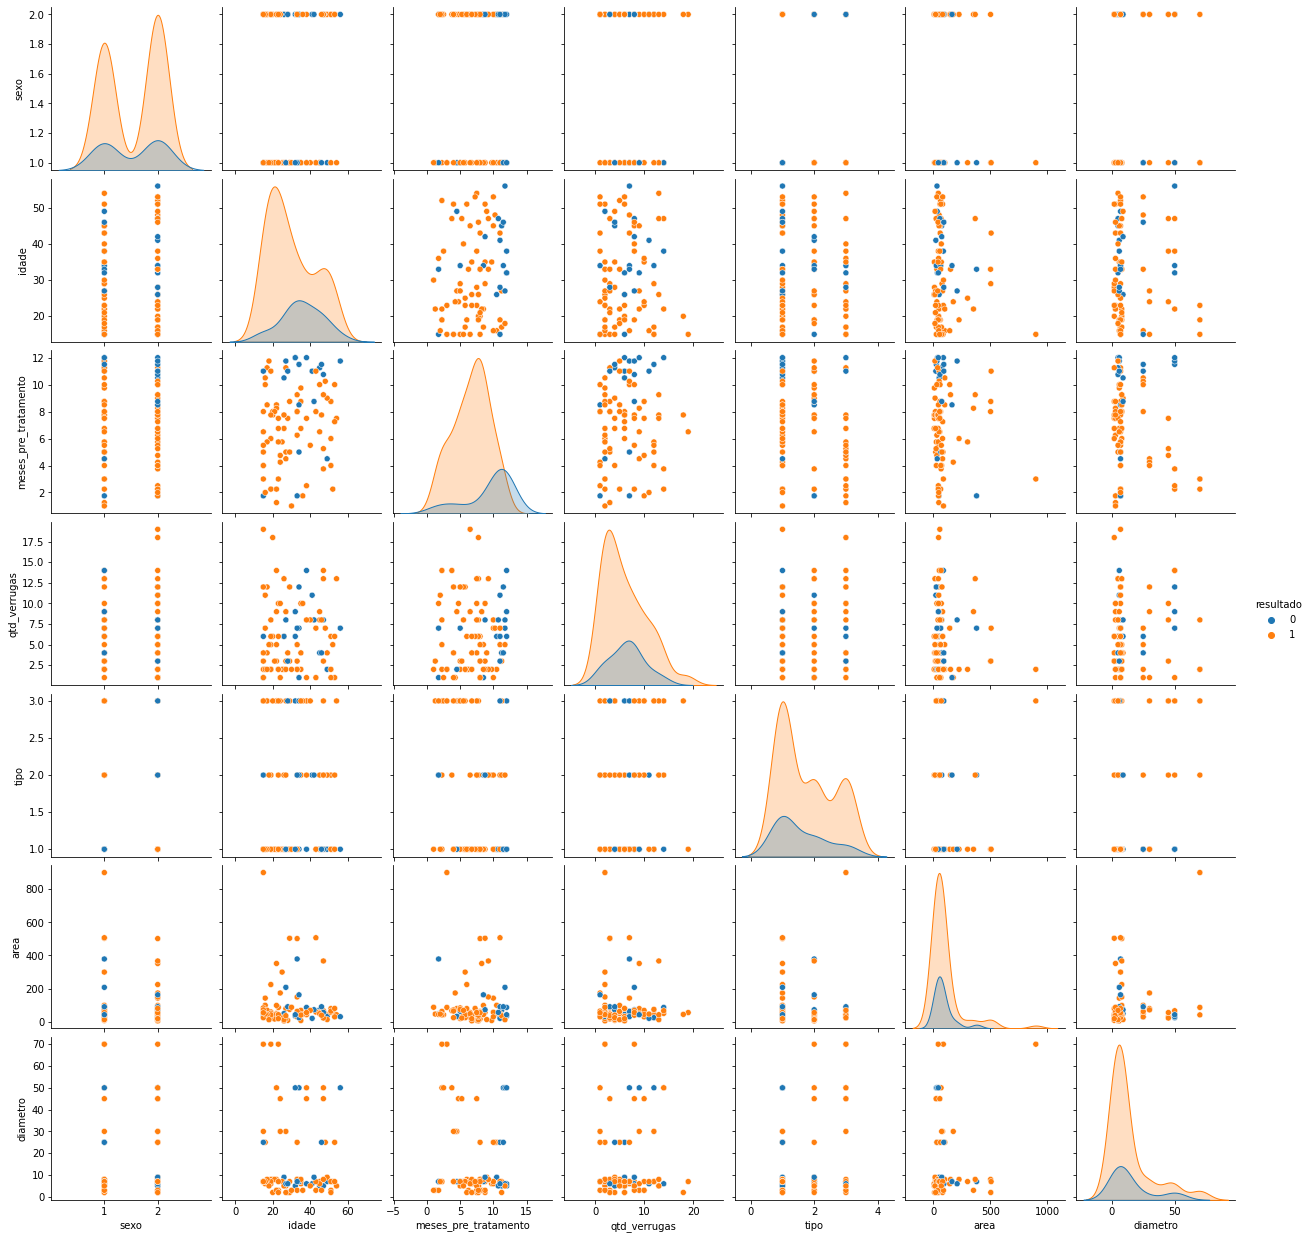

In [14]:
sns.pairplot(df, hue='resultado');

## 3.Dividindo os dados entre o que vamos usar para alimentar o modelo (X) e o que vamos tentar adivinhar (y)

In [128]:
X = df.drop(columns='resultado')

In [181]:
X.head() # são as características ou features

,sexo,idade,meses_pre_tratamento,qtd_verrugas,tipo,area,diametro
0,1,22,2.25,14,3,51,50
1,1,15,3.00,2,3,900,70
2,1,16,10.50,2,1,100,25
3,1,27,4.50,9,3,80,30
4,1,20,8.00,6,1,45,8


In [130]:
X.shape

(90, 7)

In [131]:
y = df['resultado']

In [132]:
y.shape

(90,)

In [182]:
y.head() # são os rótulos ou targets

0    1
1    1
2    1
3    1
4    1
Name: resultado, dtype: int64

### 3.a) Dividindo características e rótulos em treino e teste (para ensinar e testar o modelo)

In [127]:
from sklearn.model_selection import train_test_split

In [183]:
SEED = 42 # definindo uma constante para padronizar os resultados

In [134]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, random_state=SEED)

In [135]:
X_treino.shape, y_treino.shape

((72, 7), (72,))

In [136]:
X_teste.shape, y_teste.shape

((18, 7), (18,))

## 4.Tratando as medições diferentes dos dados

Deixando os dados com média 0 e desvio padrão 1, mais próximo de uma distribuição normal (normalizando os dados).

In [22]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
scaler.fit(X=X_treino)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [139]:
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

## 5.Criando e usando um modelo de classificação (Floresta Aleatória ou Random Forest)

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rfc = RandomForestClassifier(n_estimators=200, random_state=SEED)

### 5.a) Ajustando o modelo aos dados o treinando o modelo (fit)

In [142]:
rfc.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### 5.b) Advinhando o valor de dados novos com o modelo (predict)

In [143]:
y_pred = rfc.predict(X_teste)

In [146]:
y_pred.shape

(18,)

In [144]:
y_teste.values

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 6.Será que o modelo foi bem? 

Vendo algumas métricas.

### 6.a) Acurácia

In [163]:
# o quanto eu acertei?
14/18

0.7777777777777778

In [145]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [75]:
rfc.score(X_teste, y_teste) # acurácia

0.7777777777777778

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

### 6.b) Revocação

In [150]:
1/5 # de todos os 0s que eu tinha, quantos acertei?

0.2

In [151]:
13/13 # de todos os 1s que eu tinha, quantos acertei?

1.0

### 6.c) Precisão

In [152]:
# os 0s que eu identifiquei, acertei?
1/1

1.0

In [153]:
# os 1s que eu identifiquei, acertei?
13/17

0.7647058823529411

### 6.d) Média harmônica (f1 score)

Usada para média de percentuais como é o nosso caso.

In [161]:
# f1 de 0
2/(1 + (1/0.2))

0.3333333333333333

In [162]:
# f1 de 1
2/((1/1 + 1/0.7647058823529411))

0.8666666666666667

### 6.d) Vendo todas essas métricas no relatório de classificação (classification report)

In [77]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.76      1.00      0.87        13

    accuracy                           0.78        18
   macro avg       0.88      0.60      0.60        18
weighted avg       0.83      0.78      0.72        18



In [177]:
(1 + 0.2)/2 # média artmética = macro avg

0.6

Usamos macro quando classes precisam ser tratadas igualmente.

In [178]:
(1*5 + 0.76*13)/18 # média ponderada = weighted avg

0.8266666666666667

Usamos ponderada quando queremos saber algo mais próximo da população do que da amostra.

### 6.e) O que o modelo acertou corretamente o no que ele se enganou? (matrix de confusão)

In [78]:
cm = confusion_matrix(y_teste, y_pred)

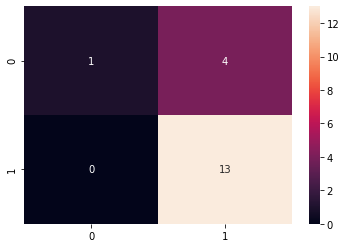

In [79]:
sns.heatmap(cm, annot=True, fmt='g');

## 7.Podemos melhorar (tunar) esse modelo?

In [80]:
from sklearn.model_selection import GridSearchCV

In [102]:
parametros = {'n_estimators':[20, 50, 100, 150, 200],
              'max_depth':[5, 10, 15, 20, 30],
              'random_state': [SEED]}

In [103]:
gs = GridSearchCV(estimator=rfc, 
                  param_grid=parametros, 
                  scoring='f1', 
                  cv=10, 
                  verbose=3)

In [104]:
gs.fit(X_treino, y_treino)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] max_depth=5, n_estimators=20, random_state=42 ...................
[CV]  max_depth=5, n_estimators=20, random_state=42, score=0.923, total=   0.0s
[CV] max_depth=5, n_estimators=20, random_state=42 ...................
[CV]  max_depth=5, n_estimators=20, random_state=42, score=0.923, total=   0.0s
[CV] max_depth=5, n_estimators=20, random_state=42 ...................
[CV]  max_depth=5, n_estimators=20, random_state=42, score=0.727, total=   0.0s
[CV] max_depth=5, n_estimators=20, random_state=42 ...................
[CV]  max_depth=5, n_estimators=20, random_state=42, score=0.909, total=   0.0s
[CV] max_depth=5, n_estimators=20, random_state=42 ...................
[CV]  max_depth=5, n_estimators=20, random_state=42, score=0.923, total=   0.0s
[CV] max_depth=5, n_estimators=20, random_state=42 ...................
[CV]  max_depth=5, n_estimators=20, random_state=42, score=1.000, total=   0.0s
[CV] max_depth=5, n_estimators=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=5, n_estimators=20, random_state=42, score=0.923, total=   0.0s
[CV] max_depth=5, n_estimators=20, random_state=42 ...................
[CV]  max_depth=5, n_estimators=20, random_state=42, score=1.000, total=   0.0s
[CV] max_depth=5, n_estimators=20, random_state=42 ...................
[CV]  max_depth=5, n_estimators=20, random_state=42, score=0.923, total=   0.0s
[CV] max_depth=5, n_estimators=20, random_state=42 ...................
[CV]  max_depth=5, n_estimators=20, random_state=42, score=0.923, total=   0.0s
[CV] max_depth=5, n_estimators=50, random_state=42 ...................
[CV]  max_depth=5, n_estimators=50, random_state=42, score=0.923, total=   0.1s
[CV] max_depth=5, n_estimators=50, random_state=42 ...................
[CV]  max_depth=5, n_estimators=50, random_state=42, score=0.923, total=   0.1s
[CV] max_depth=5, n_estimators=50, random_state=42 ...................
[CV]  max_depth=5, n_estimators=50, random_state=42, score=0.727, total=   0.1s
[CV] max_depth

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   37.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [105]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [106]:
melhor_modelo = gs.best_estimator_

In [107]:
melhor_modelo.score(X_teste, y_teste)

0.8333333333333334

In [108]:
melhor_modelo.predict(X_teste)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [109]:
y_pred_melhor = melhor_modelo.predict(X_teste)

In [110]:
print(classification_report(y_teste, y_pred_melhor))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.81      1.00      0.90        13

    accuracy                           0.83        18
   macro avg       0.91      0.70      0.73        18
weighted avg       0.86      0.83      0.81        18



In [111]:
cm_melhor = confusion_matrix(y_teste, y_pred_melhor)

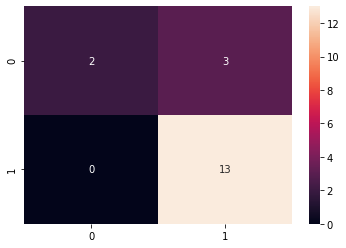

In [112]:
sns.heatmap(cm_melhor, annot=True);

## 8.Salvando o modelo em um arquivo

In [188]:
import pickle

In [189]:
pickle.dump(melhor_modelo, open('modelo.pkl', 'wb'))

In [190]:
modelo = pickle.load(open('modelo.pkl', 'rb'))

In [191]:
modelo.score(X_teste, y_teste)

0.8333333333333334